In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV                  

In [2]:
data = pd.read_csv('./Downloads/android_bids_us.csv')
                   

In [3]:
data.info()
#3148828 rows × 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 12 columns):
bidid            object
utc_time         int64
app_id           object
user_state       object
user_isp         object
device_maker     object
device_model     object
device_osv       object
device_height    int64
device_width     int64
marketplace      object
click            int64
dtypes: int64(4), object(8)
memory usage: 288.3+ MB


In [4]:
data['click'].value_counts()


0    2935629
1     213199
Name: click, dtype: int64

In [5]:
data.isnull().sum()
#1. Looking for Missing Values
#user_isp             39
#device_maker     964004
#device_model     963858

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     964004
device_model     963858
device_osv            0
device_height         0
device_width          0
marketplace           0
click                 0
dtype: int64

In [6]:
data.drop(['device_maker', 'device_model', 'user_isp'], axis=1,  inplace=True )

In [7]:
data.nunique()
#2 features with a single unique value is the only one: 'marketplace   1'
#utc_time  3147513 unique entries

bidid            2936921
utc_time         3147513
app_id             14869
user_state            51
device_osv            20
device_height        308
device_width         248
marketplace            1
click                  2
dtype: int64

In [8]:
data.drop(columns = ['marketplace', 'bidid'], axis=1, inplace=True)
data.columns

Index(['utc_time', 'app_id', 'user_state', 'device_osv', 'device_height',
       'device_width', 'click'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 7 columns):
utc_time         int64
app_id           object
user_state       object
device_osv       object
device_height    int64
device_width     int64
click            int64
dtypes: int64(4), object(3)
memory usage: 168.2+ MB


In [10]:
data.head(1)

,utc_time,app_id,user_state,device_osv,device_height,device_width,click
0,1536444331894,com.OppanaGames.CarSim,TX,7.0,720,1280,0


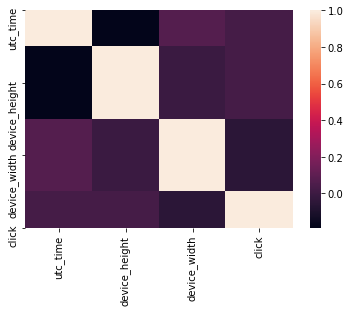

In [11]:
#To plot all of the correlations in the data
sns.heatmap(data.corr());

#none features with a correlation magnitude 

In [12]:
data['user_state'].value_counts().head(10)

TX    409365
CA    394602
FL    263207
IL    194379
NY    180546
GA    127141
MI    120948
NC    120590
OH    102463
PA     90165
Name: user_state, dtype: int64

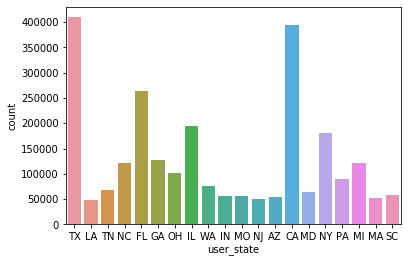

In [13]:
sns.countplot(data[data['user_state'].isin(data['user_state'].value_counts().head(20).index)]['user_state']) ;
#the most popular 20 states in the dataftame

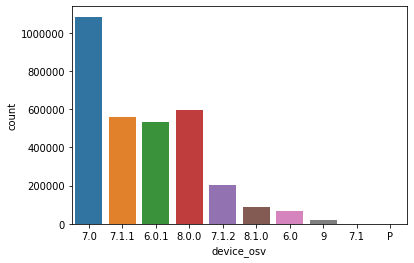

In [14]:
sns.countplot(data[data['device_osv'].isin(data['device_osv'].value_counts().head(10).index)]['device_osv']);
#the most popular os of users in the dataftame

In [15]:
data['device_osv'].value_counts().head(10)

7.0      1083916
8.0.0     596679
7.1.1     557710
6.0.1     535421
7.1.2     201139
8.1.0      88852
6.0        64873
9          20121
7.1           59
P             20
Name: device_osv, dtype: int64

In [16]:
data['Timestamp'] = pd.to_datetime(data['utc_time'], unit='ms')

In [17]:
data['Timestamp'].nunique()

3147513

In [18]:
#Engineerin new features

data['month_day'] = data['Timestamp'].dt.day
data["week_day"] = data['Timestamp'].dt.dayofweek
data['day_hour'] = data['Timestamp'].dt.hour



In [19]:
data.drop(['utc_time'], axis=1, inplace=True) 


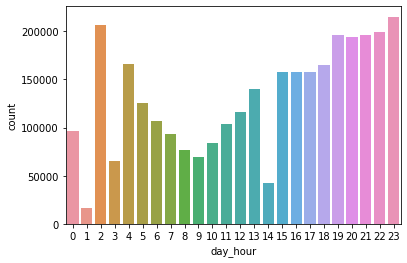

In [20]:
sns.countplot(data[data['day_hour'].isin(data['day_hour'].value_counts().head(24).index)]['day_hour']);
#user activity by hours

In [21]:
data['day_hour'].value_counts().head(6)

23    215106
2     206561
22    199516
19    196143
21    195831
20    194491
Name: day_hour, dtype: int64

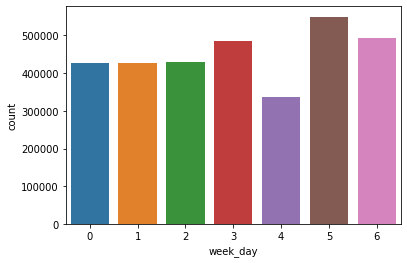

In [22]:
sns.countplot(data[data['week_day'].isin(data['week_day'].value_counts().head(7).index)]['week_day']);
#user activity by days of week

In [23]:
data['week_day'].value_counts().head(7)

5    549415
6    494335
3    485900
2    428249
0    427143
1    426998
4    336788
Name: week_day, dtype: int64

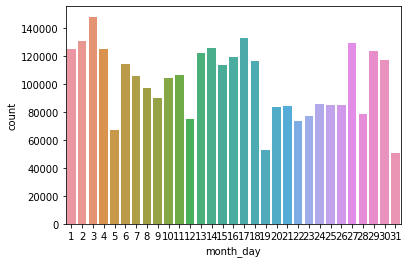

In [24]:
sns.countplot(data[data['month_day'].isin(data['month_day'].value_counts().head(31).index)]['month_day']);
#user activity in the month period

In [25]:
data['month_day'].value_counts().head(10)

3     148197
17    133330
2     130697
27    129357
14    125999
4     125489
1     124885
29    123482
13    122363
16    119236
Name: month_day, dtype: int64

In [26]:
data.columns

Index(['app_id', 'user_state', 'device_osv', 'device_height', 'device_width',
       'click', 'Timestamp', 'month_day', 'week_day', 'day_hour'],
      dtype='object')

In [27]:
#devices with albom and  book visualisation
data['horizontal_dev'] = (data['device_height'] > data['device_width']).astype(int)

In [28]:
pd.crosstab(data.click, data.horizontal_dev)
#dependecy on horizontal dev and click

horizontal_dev,0,1
click,,
0,1475282,1460347
1,80189,133010


In [29]:
data.drop(['device_height', 'device_width'], axis=1, inplace=True) 

In [30]:
data.columns

Index(['app_id', 'user_state', 'device_osv', 'click', 'Timestamp', 'month_day',
       'week_day', 'day_hour', 'horizontal_dev'],
      dtype='object')

In [31]:
df = pd.read_csv('./Downloads/zipcode.csv')
#https://data.world/bryon/us-zipcodes/workspace/file?filename=zipcode.csv

In [32]:
df.head()

,zip,city,state,latitude,longitude,timezone,dst
0,210,Portsmouth,NH,43.005895,-71.013202,-5,1
1,211,Portsmouth,NH,43.005895,-71.013202,-5,1
2,212,Portsmouth,NH,43.005895,-71.013202,-5,1
3,213,Portsmouth,NH,43.005895,-71.013202,-5,1
4,214,Portsmouth,NH,43.005895,-71.013202,-5,1


In [33]:
tz_s = df[['state', 'timezone']].drop_duplicates()

In [34]:
tz_s.shape
#we have here 68 states because some of them are included in several timezones

(68, 2)

In [35]:
df['timezone'].unique()
# we have 7 timezones in the USA [ -5,  -4,  -6,  -7,  -8, -10,  -9] hours

array([ -5,  -4,  -6,  -7,  -8, -10,  -9], dtype=int64)

In [36]:
data.rename(columns={'user_state': 'state'}, inplace=True)
#changing the name to make easy merging 

In [37]:
data.columns

Index(['app_id', 'state', 'device_osv', 'click', 'Timestamp', 'month_day',
       'week_day', 'day_hour', 'horizontal_dev'],
      dtype='object')

In [38]:
pd.merge(data, tz_s, how='left')

,app_id,state,device_osv,click,Timestamp,month_day,week_day,day_hour,horizontal_dev,timezone
0,com.OppanaGames.CarSim,TX,7.0,0,2018-09-08 22:05:31.894,8,5,22,0,-6
1,com.OppanaGames.CarSim,TX,7.0,0,2018-09-08 22:05:31.894,8,5,22,0,-7
2,com.mobilityware.CrownSolitaire,TX,7.0,0,2018-09-08 22:06:03.932,8,5,22,1,-6
3,com.mobilityware.CrownSolitaire,TX,7.0,0,2018-09-08 22:06:03.932,8,5,22,1,-7
4,com.kuttigames.tenkyurollball,LA,7.1.1,0,2018-09-08 22:06:26.908,8,5,22,0,-6
...,...,...,...,...,...,...,...,...,...,...
4563342,com.slots.realvegas,GA,8.1.0,0,2018-11-06 02:48:05.093,6,1,2,1,-5
4563343,br.com.tapps.penguinevolution,MO,7.1.2,0,2018-11-06 02:48:36.760,6,1,2,1,-6
4563344,air.com.FDGEntertainment.Lonewolf.gp,WI,7.0,0,2018-11-06 02:49:12.347,6,1,2,0,-6
4563345,com.shoot.strike.gun.fire.d,CA,7.0,0,2018-11-06 02:49:13.004,6,1,2,0,-8


In [39]:
common = pd.merge(data, tz_s, how='left')
#size is different

In [40]:
common.isnull().sum()
#no nulls

app_id            0
state             0
device_osv        0
click             0
Timestamp         0
month_day         0
week_day          0
day_hour          0
horizontal_dev    0
timezone          0
dtype: int64

In [41]:
common['state'].nunique()

51

In [42]:
common['Timestamp'].nunique()

3147513

In [43]:
common['device_osv'].nunique()

20

In [44]:
#creating codes for 20 'device_osv'
common['device_osv_codes'] = common['device_osv'].astype('category').cat.codes

In [45]:
#creating codes for 51 'state'
common['state_codes'] = common['state'].astype('category').cat.codes

In [46]:
common.drop_duplicates(subset=['Timestamp'], inplace=True)

In [47]:
common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3147513 entries, 0 to 4563345
Data columns (total 12 columns):
app_id              object
state               object
device_osv          object
click               int64
Timestamp           datetime64[ns]
month_day           int64
week_day            int64
day_hour            int64
horizontal_dev      int32
timezone            int64
device_osv_codes    int8
state_codes         int8
dtypes: datetime64[ns](1), int32(1), int64(5), int8(2), object(3)
memory usage: 258.1+ MB


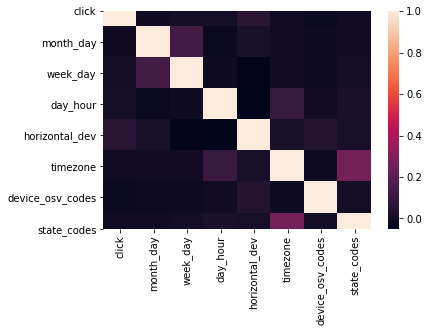

In [48]:
#To plot all of the correlations in the data
sns.heatmap(common.corr());

In [49]:
common.corr()

,click,month_day,week_day,day_hour,horizontal_dev,timezone,device_osv_codes,state_codes
click,1.000000,-0.004736,0.003188,0.006243,0.063521,-0.001068,-0.018360,-0.003269
month_day,-0.004736,1.000000,0.136269,-0.022812,0.020754,-0.001595,-0.012859,-0.001655
week_day,0.003188,0.136269,1.000000,-0.008040,-0.042991,-0.002735,-0.015477,0.000909
day_hour,0.006243,-0.022812,-0.008040,1.000000,-0.048788,0.110346,-0.002976,0.021614
horizontal_dev,0.063521,0.020754,-0.042991,-0.048788,1.000000,0.016783,0.048918,0.014588
timezone,-0.001068,-0.001595,-0.002735,0.110346,0.016783,1.000000,-0.011753,0.260768
device_osv_codes,-0.018360,-0.012859,-0.015477,-0.002976,0.048918,-0.011753,1.000000,0.000936
state_codes,-0.003269,-0.001655,0.000909,0.021614,0.014588,0.260768,0.000936,1.000000


In [50]:
common.groupby( 'click')['state','horizontal_dev'].count()

,state,horizontal_dev
click,,
0,2934411,2934411
1,213102,213102


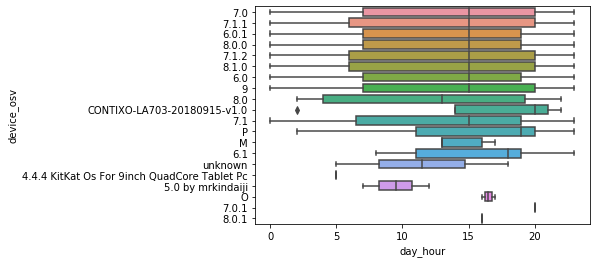

In [51]:
sns.boxplot(x='day_hour', y='device_osv', data=common);

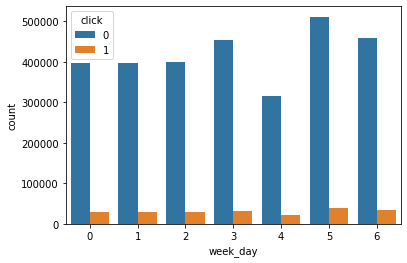

In [52]:
sns.countplot(x='week_day', hue='click', data=common);

In [53]:
common

,app_id,state,device_osv,click,Timestamp,month_day,week_day,day_hour,horizontal_dev,timezone,device_osv_codes,state_codes
0,com.OppanaGames.CarSim,TX,7.0,0,2018-09-08 22:05:31.894,8,5,22,0,-6,5,43
2,com.mobilityware.CrownSolitaire,TX,7.0,0,2018-09-08 22:06:03.932,8,5,22,1,-6,5,43
4,com.kuttigames.tenkyurollball,LA,7.1.1,0,2018-09-08 22:06:26.908,8,5,22,0,-6,8,18
5,com.trendactionfree.call_of_sniper_duty_frontl...,TN,6.0.1,0,2018-09-08 22:06:45.023,8,5,22,0,-5,3,42
7,com.landslab.my3rdgrademathgames,NC,7.1.1,0,2018-09-08 22:07:23.458,8,5,22,1,-5,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...
4563340,com.altitude.rrsv,TX,7.0,0,2018-11-06 02:47:38.853,6,1,2,0,-6,5,43
4563342,com.slots.realvegas,GA,8.1.0,0,2018-11-06 02:48:05.093,6,1,2,1,-5,13,10
4563343,br.com.tapps.penguinevolution,MO,7.1.2,0,2018-11-06 02:48:36.760,6,1,2,1,-6,9,24
4563344,air.com.FDGEntertainment.Lonewolf.gp,WI,7.0,0,2018-11-06 02:49:12.347,6,1,2,0,-6,5,48


In [54]:
#creating codes for app_id
common['app_id_codes'] = common['app_id'].astype('category').cat.codes

<h1>       predictions    </h>

In [55]:
#Taking the numerical data
df100 = common[['state_codes', 'device_osv_codes', 'horizontal_dev', 'day_hour', 'week_day', 'month_day','click', 'app_id_codes']]
df100.head(10)

,state_codes,device_osv_codes,horizontal_dev,day_hour,week_day,month_day,click,app_id_codes
0,43,5,0,22,5,8,0,1276
2,43,5,1,22,5,8,0,8502
4,18,8,0,22,5,8,0,7607
5,42,3,0,22,5,8,0,12597
7,27,8,1,22,5,8,0,7636
8,9,5,0,22,5,8,0,7359
10,9,8,0,22,5,8,0,11012
12,10,11,1,22,5,8,0,259
13,21,11,0,22,5,8,0,4532
14,44,5,0,22,5,8,0,4553


In [56]:
X = np.asarray(df100[['state_codes', 'device_osv_codes', 'horizontal_dev', 'day_hour', 'week_day', 'month_day', 'app_id_codes']])
X.shape


(3147513, 7)

In [57]:
y = np.asarray(df100['click'])
y.shape

(3147513,)

In [58]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
#normalize dataset

array([[ 1.2994239 , -0.589815  , -1.01211624,  1.22237575,  0.93155657,
        -0.79354176, -1.35058554],
       [ 1.2994239 , -0.589815  ,  0.98802881,  1.22237575,  0.93155657,
        -0.79354176,  0.30959773],
       [-0.36050315,  0.39027595, -1.01211624,  1.22237575,  0.93155657,
        -0.79354176,  0.10397027],
       [ 1.23302682, -1.24320897, -1.01211624,  1.22237575,  0.93155657,
        -0.79354176,  1.25042951],
       [ 0.23707059,  0.39027595,  0.98802881,  1.22237575,  0.93155657,
        -0.79354176,  0.11063306]])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#spliting the data

Train set: (2203259, 7) (2203259,)
Test set: (944254, 7) (944254,)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.94121986, 0.05878014],
       [0.9492443 , 0.0507557 ],
       [0.91552179, 0.08447821],
       ...,
       [0.942906  , 0.057094  ],
       [0.91159728, 0.08840272],
       [0.90789634, 0.09210366]])

In [63]:
## Test accuracy
acc = accuracy_score(y_test, yhat)
print('Test Accuracy {}'.format(acc))             

Test Accuracy 0.932451437854645


In [64]:
#feature importance

In [65]:
from feature_selector import FeatureSelector

In [67]:
lables_df= df100['click']

In [68]:
fs = FeatureSelector(data = df100, labels = lables_df)

In [69]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.199191
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.199191
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.199191
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.199191
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.199191
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.199191
Training until validation scores don't improve f

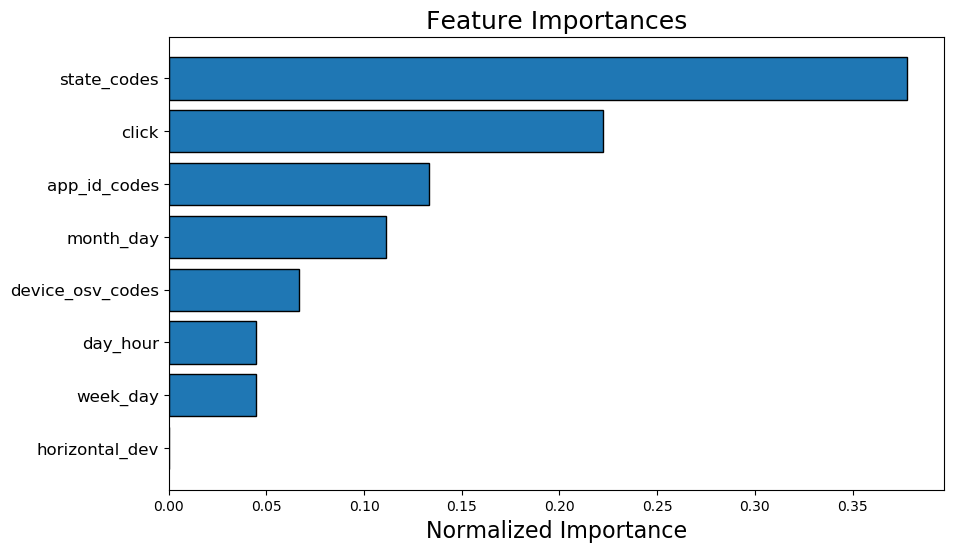

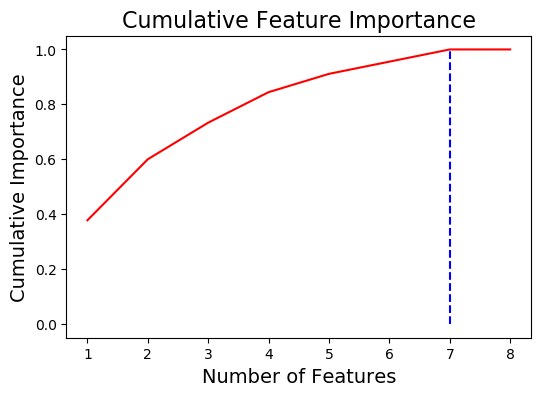

7 features required for 0.99 of cumulative importance


In [70]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 8)

In [71]:
fs.feature_importances.head(8)

,feature,importance,normalized_importance,cumulative_importance
0,state_codes,1.7,0.377778,0.377778
1,click,1.0,0.222222,0.600000
2,app_id_codes,0.6,0.133333,0.733333
3,month_day,0.5,0.111111,0.844444
4,device_osv_codes,0.3,0.066667,0.911111
5,day_hour,0.2,0.044444,0.955556
6,week_day,0.2,0.044444,1.000000
7,horizontal_dev,0.0,0.000000,1.000000


In [72]:
#Trees

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
X3 = df100[['state_codes', 'device_osv_codes', 'horizontal_dev', 'day_hour', 'week_day', 'month_day', 'app_id_codes']].values
X3.shape
#

(3147513, 7)

In [75]:
X3_trainset, X3_testset, y3_trainset, y3_testset = train_test_split(X3, y, test_size=0.3, random_state=3)

In [76]:
click_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

click_Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
click_Tree = click_Tree.fit(X3_trainset,y3_trainset)

In [78]:
predTree = click_Tree.predict(X3_testset)

In [79]:
print (predTree [0:100])
print (y3_testset [0:100])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [80]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y3_testset, predTree))

DecisionTrees's Accuracy:  0.9323031726632877
